In [1]:
#import and set the file

import pandas as pd

exchange_rates = pd.read_csv('/kaggle/input/euro-daily-hist-1999-2020/euro-daily-hist_1999_2020.csv')
exchange_rates.head()
exchange_rates.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5699 entries, 0 to 5698
Data columns (total 41 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Period\Unit:              5699 non-null   object 
 1   [Australian dollar ]      5699 non-null   object 
 2   [Bulgarian lev ]          5297 non-null   object 
 3   [Brazilian real ]         5431 non-null   object 
 4   [Canadian dollar ]        5699 non-null   object 
 5   [Swiss franc ]            5699 non-null   object 
 6   [Chinese yuan renminbi ]  5431 non-null   object 
 7   [Cypriot pound ]          2346 non-null   object 
 8   [Czech koruna ]           5699 non-null   object 
 9   [Danish krone ]           5699 non-null   object 
 10  [Estonian kroon ]         3130 non-null   object 
 11  [UK pound sterling ]      5699 non-null   object 
 12  [Greek drachma ]          520 non-null    object 
 13  [Hong Kong dollar ]       5699 non-null   object 
 14  [Croatia

In [2]:
#clean up
exchange_rates.rename(columns={'[Turkish lira ]': 'TRY',
                               'Period\\Unit:': 'Time'},
                      inplace=True)
exchange_rates['Time'] = pd.to_datetime(exchange_rates['Time'])
exchange_rates.sort_values('Time', inplace=True)
exchange_rates.reset_index(drop=True, inplace=True)
exchange_rates.head()

#split
euro_to_try = exchange_rates[['Time', 'TRY']].copy()
euro_to_try['TRY'].value_counts()

euro_to_try.dropna(subset=['TRY'], inplace=True)

In [3]:
euro_to_try['TRY'] = euro_to_try['TRY'].astype(float)
euro_to_try.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5637 entries, 0 to 5698
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Time    5637 non-null   datetime64[ns]
 1   TRY     5637 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 132.1 KB


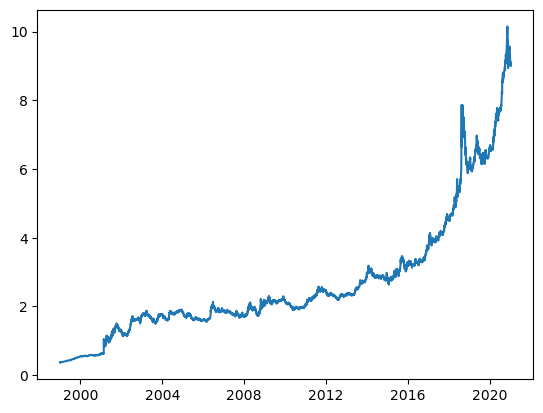

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(euro_to_try['Time'], euro_to_try['TRY'])
plt.show()

In [5]:
euro_to_try['rolling_mean'] = euro_to_try['TRY'].rolling(30).mean()
euro_to_try

,Time,TRY,rolling_mean
0,1999-01-04,0.3723,NaN
1,1999-01-05,0.3728,NaN
2,1999-01-06,0.3722,NaN
3,1999-01-07,0.3701,NaN
4,1999-01-08,0.3718,NaN
...,...,...,...
5694,2021-01-04,9.0579,9.357613
5695,2021-01-05,9.0694,9.358360
5696,2021-01-06,9.0554,9.351420
5697,2021-01-07,8.9987,9.336537


In [6]:
babacan = euro_to_try.copy(
                   )[(euro_to_try['Time'].dt.year >= 2011
                   ) & (euro_to_try['Time'].dt.year <= 2015)]
simsek = euro_to_try.copy(
                   )[(euro_to_try.Time.dt.year >= 2015
                   ) & (euro_to_try.Time.dt.year <= 2018)]
berat = euro_to_try.copy(
                   )[(euro_to_try.Time.dt.year >= 2018
                   ) & (euro_to_try.Time.dt.year <= 2020)]

babacan.head()

,Time,TRY,rolling_mean
3130,2011-01-03,2.0807,2.009633
3131,2011-01-04,2.0744,2.012380
3132,2011-01-05,2.0490,2.014830
3133,2011-01-06,2.0251,2.016800
3134,2011-01-07,2.0344,2.018923


/tmp/ipykernel_32/1496912506.py:17: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[0].set_xticklabels(['', '2009', '', '2011', '', '2013', '', '2015'], alpha=0.3)
/tmp/ipykernel_32/1496912506.py:24: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[1].set_xticklabels(['', '2015', '', '2016', '', '2017', '', '2018'], alpha=0.3)
/tmp/ipykernel_32/1496912506.py:31: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[2].set_xticklabels(['', '2015', '', '2017', '', '2019', '', '2020', ''], alpha=0.3)


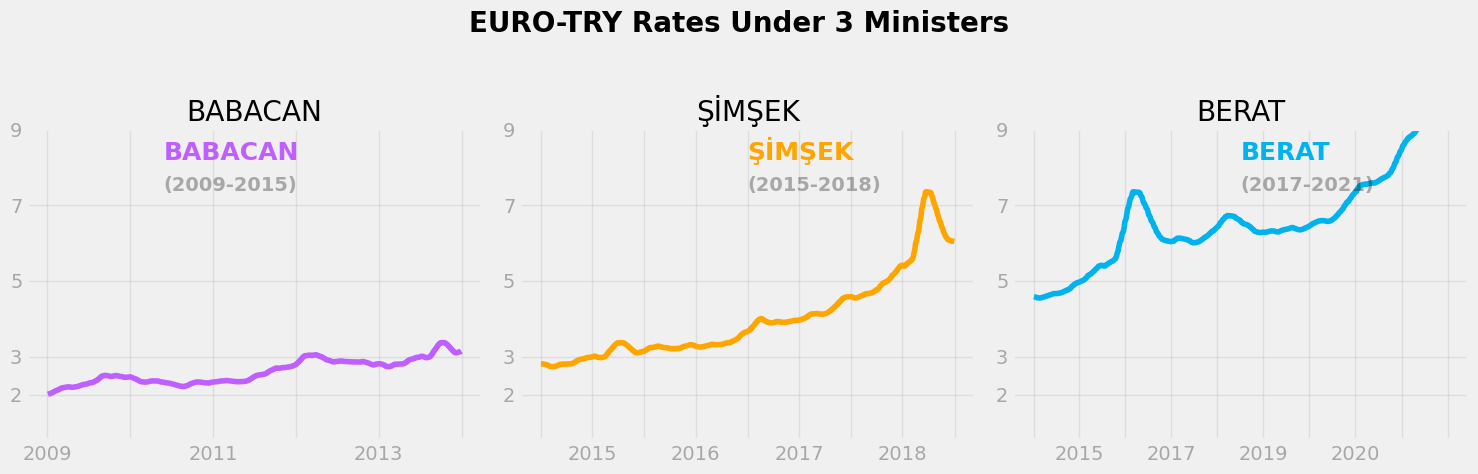

In [8]:
import matplotlib.pyplot as plt
import matplotlib.style as style

style.use('fivethirtyeight')

fig, axes = plt.subplots(1, 3, figsize=(15, 5))

for ax in axes:
    ax.set_ylim(0.8, 1.7)
    ax.set_yticks([2, 3,5, 7, 9])
    ax.set_yticklabels(['2', '3','5', '7', '9'],
                   alpha=0.3)
    ax.grid(alpha=0.5)    

# Plot 1: Babacan
axes[0].plot(babacan['Time'], babacan['rolling_mean'], color='#BF5FFF')
axes[0].set_xticklabels(['', '2009', '', '2011', '', '2013', '', '2015'], alpha=0.3)
axes[0].set_title('BABACAN')
axes[0].text(0.3, 0.9, 'BABACAN', fontsize=18, weight='bold', color='#BF5FFF', transform=axes[0].transAxes)
axes[0].text(0.3, 0.8, '(2009-2015)', weight='bold', alpha=0.3, transform=axes[0].transAxes)

# Plot 2: Simsek
axes[1].plot(simsek['Time'], simsek['rolling_mean'], color='#ffa500')
axes[1].set_xticklabels(['', '2015', '', '2016', '', '2017', '', '2018'], alpha=0.3)
axes[1].set_title('ŞİMŞEK')
axes[1].text(0.5, 0.9, 'ŞİMŞEK', fontsize=18, weight='bold', color='#ffa500', transform=axes[1].transAxes)
axes[1].text(0.5, 0.8, '(2015-2018)', weight='bold', alpha=0.3, transform=axes[1].transAxes)

# Plot 3: berat
axes[2].plot(berat['Time'], berat['rolling_mean'], color='#00B2EE')
axes[2].set_xticklabels(['', '2015', '', '2017', '', '2019', '', '2020', ''], alpha=0.3)
axes[2].set_title('BERAT')
axes[2].text(0.5, 0.9, 'BERAT', fontsize=18, weight='bold', color='#00B2EE', transform=axes[2].transAxes)
axes[2].text(0.5, 0.8, '(2017-2021)', weight='bold', alpha=0.3, transform=axes[2].transAxes)

fig.suptitle('EURO-TRY Rates Under 3 Ministers', fontsize=20, weight='bold')
fig.tight_layout(rect=[0, 0.03, 1, 0.95])

plt.show()
